# 1. Práctica *Machine Learning* - Problema de regresión para predecir el precio de un airbnb



## 0. Introducción

En esta práctica de **Machine Learning**, se trabajará con un conjunto de datos de **Airbnb de Madrid** que contiene una gran cantidad de variables relacionadas con las propiedades ofrecidas en la plataforma. El objetivo principal es analizar y modelar estos datos para resolver un **problema de regresión**, cuyo propósito es **predecir el precio por noche** de las propiedades listadas en Airbnb.  

El trabajo se desarrollará en tres fases principales:  
- **Carga de datos y división en Train y Test**: En esta etapa se cargará el fichero con todos los datos de los airbnbs y se hará la división entre dos datasets: Train y Test. Durante la práctica, se tratará solamente con el conjunto de Train. Esto implica que todo el tratamiento de variables, creación de variables nuevas y filtrados se harán sobre el dataset de Train, y, finalmente en la etapa de modelado, se aplicarán todos los cambios realizados en el dataset de Train al de Test.

- **Análisis Exploratorio de Datos (EDA)**: En esta etapa, se examinará la estructura del conjunto de datos, se realizará un análisis estadístico básico y se identificarán posibles valores atípicos (outliers). Además, se evaluará la distribución de las variables y se estudiarán sus relaciones con el precio, con el fin de obtener información relevante para la etapa de modelado.  

- **Visualización de Datos**: Se crearán gráficos que faciliten la comprensión de las variables más importantes, sus tendencias y su impacto en el precio de las propiedades. A través de esta etapa, se podrán identificar patrones, correlaciones y comportamientos específicos de los datos.  

3. **Modelado Predictivo**: En esta fase, se implementarán y compararán dos modelos de regresión:  
   - **Lasso Regression**: Lasso (Least Absolute Shrinkage and Selection Operator) es un modelo de regresión lineal que aplica una penalización L1 a los coeficientes de las variables. Esta penalización reduce a cero los coeficientes de las características menos importantes, lo que permite realizar selección de variables automáticamente y evitar el sobreajuste del modelo. Lasso es especialmente útil cuando se tiene un conjunto de datos con muchas variables, ya que ayuda a simplificar el modelo y a identificar las características más relevantes.  
   - **Boosted Trees**: Los modelos Boosted Trees (árboles de decisión potenciados) son un método de aprendizaje supervisado basado en árboles de decisión, donde múltiples árboles se combinan secuencialmente para mejorar el rendimiento del modelo. Cada árbol se entrena para corregir los errores cometidos por los árboles anteriores, lo que permite lograr un modelo final robusto y preciso.

## 1. Carga de datos y División train/test
Se va a dividir el conjunto de datos en dos partes: entrenamiento (train) y prueba (test).
Dividir los datos en train y test sirve para entrenar el modelo con una parte de los datos y evaluar su desempeño con otra que no ha visto. Esto ayuda a comprobar si el modelo puede generalizar bien a nuevos datos o si simplemente memorizó los del entrenamiento (overfitting).

Puesto que el conjunto de datos tiene una gran cantidad de valores, en este caso, la división va a ser un 80% de los datos para train y un 20% para test.



Primero cargamos los datos:

In [1]:
# Se hacen las importaciones necesarias para toda la práctica.

import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt

In [2]:
airbnbData = pd.read_csv("./airbnb-listings-extract.csv", sep=';', encoding = "latin")
print(airbnbData.shape)
airbnbData.head(3)

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."


Y a continuación, se hace la división de los datos en los conjuntos de Train y Test.

In [3]:
# Se dividen los datos en conjuntos de entrenamiento y prueba.
train, test = train_test_split(airbnbData, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos los dos datasets en archivos csv
train.to_csv('./airbnbTrain.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnbTest.csv', sep=';', decimal='.', index=False)

# Ahora se va a trabajr exclusivamente con el dataset de train.
airbnbTrain = pd.read_csv('./airbnbTrain.csv', sep=';', decimal='.')
airbnbTrain.head(5)


Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,"Un piso muy cÃ³modo en JerÃ³nimos, una de las ...",Piso reciÃ©n reformado cÃ³moda habitaciÃ³n con...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",El apartamento dispone de un dormitorio indepe...,"Lugares de interÃ©s: Plaza Mayor, Plaza del So...",none,"Situado en el corazÃ³n de Madrid, este apartam...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,NaN,æçæ¿æºé è¿é¤å åé¤é¥®ãéåå®¶å...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


Como se ha mencionado, a partir de ahora se continuará trabajando exclusivamente con el conjunto de Train hasta el apartado 4, donde aplicaremos todos los cambios aplicados al conjunto de Train al de test.

# 2. Análisis exploratorio
Para analizar el dataset, aplicamos las funciones de la librería Pandas como son, describe, dtypes, shape, etc.

In [68]:
airbnbTrain.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Gracias al método describe(), se puede obervar que no todas las columnas tienen el mismo número de valores, lo que indica que hay variables con valores a null o variables que verdaderamente no necesitamos para el modelo.
Además, también se puede ver que hay características que no van a  aportar valor al modelo de entrenamiento, por lo que se hará un eliminado de las mismas.

A continuación, se va a mostrar distintas métricas de la columna Price, que es el target, para analizarlos.

In [69]:
# Ver las estadísticas descriptivas solo para la columna 'price'
airbnbTrain['Price'].describe()


count    11809.000000
mean        73.712592
std         71.624844
min          9.000000
25%         34.000000
50%         55.000000
75%         87.000000
max        969.000000
Name: Price, dtype: float64

Le media del precio es de 73.561471. Esta medida se tendrá en cuenta cuando se entrene el modelo para comparar el error obtenido en la predicción del precio por noche en los airbnbs.
También podemos ver que el valor mínimo del precio por noche es 9, mientras que el valor máximo es 969. 

A continuación, con el uso de Shape para el dataset, podemos ver las dimensiones del conjunto.

In [70]:
print(f'Dimensiones del dataset son: {airbnbTrain.shape}')

Dimensiones del dataset son: (11824, 89)


En este caso, el modelo tiene 11824 filas y 89 columnas. 
Tener un dataset con 89 características puede llevar a problemas como sobreajuste, mayor tiempo de cómputo, dificultad para interpretar resultados y la presencia de variables irrelevantes o redundantes.

Para solucionarlo, es clave aplicar selección de características o eliminar variables poco relevantes o correlacionadas. Esto ayuda a simplificar el modelo, mejorar su rendimiento y facilitar su interpretación.

### Eliminación de características.
La eliminación de características es importante ya que siempre hay variables que no afectan al target y que simplemente no deben formar parte del dataset para entrenar el modelo. Eliminarlas es necesario para no añadir ruido. 
Tras haber visto todas las columnas del dataset, se puede afirmar que hay columnas que no van a aportar valor al modelo, sino que van a meter ruido. 
Estas columnas son todas aquellas que contienen descripciones, URLs, nombres, fechas, IDs, textos escritos por los usuarios, imágenes, direcciones, etc.
A continuación, se van a borrar todas estas columnas nombradas:

In [33]:
# Listado de columnas irrelevantes a eliminar
columns_to_drop_irrelevant = ['ID', 'Listing Url', 'Scrape ID',  'Name', 'Summary','Space','Neighborhood Overview',
                   'Notes','Transit','Access',
                   'Interaction', 'House Rules',
                   'Description', 'Experiences Offered', 'Thumbnail Url', 'Medium Url',
                   'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
                   'Host Since', 'Host Location',
                   'Host Thumbnail Url', 'Host Picture Url',  'Street',
                   'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  'State',
                   'Zipcode', 'Market', 'Smart Location',
                   'Calendar Updated',
                   'Calendar last Scraped','Host About', 'Host Response Time',
                    'Host Neighbourhood',  'Security Deposit',
                    'First Review', 'Last Review',
                    'Jurisdiction Names', 'Last Scraped', 'Geolocation', 'Longitude','Latitude']

# Eliminar las columnas irrelevantes
airbnbTrain = airbnbTrain.drop(columns=columns_to_drop_irrelevant)

In [6]:
print(f'Número de columnas en airbnbTrain tras el borrado: {airbnbTrain.shape[1]}')

Número de columnas en airbnbTrain tras el borrado: 44


### Tratamiento de valores null.
Vamos a ver si verdaderamente hay valores null en los datos para eliminarlos o imputar valores en estos casos.

In [7]:
airbnbTrain.isnull().sum()

Host Response Rate                 1507
Host Acceptance Rate              11794
Host Listings Count                   3
Host Total Listings Count             3
Host Verifications                    7
Neighbourhood                      4159
City                                  4
Country Code                          0
Country                               1
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            44
Bedrooms                             20
Beds                                 37
Bed Type                              0
Amenities                           141
Square Feet                       11350
Price                                15
Weekly Price                       8943
Monthly Price                      8955
Cleaning Fee                       4850
Guests Included                       0
Extra People                          0
Minimum Nights                        0


Hay columnas que tienen muy pocos valores a null, pero en cambio hay otras con un valor bastante grande de valores null. 

Para aquellas columnas con más del 10% de sus valores nulos, vamos a eliminarlas para evitar introducir un gran sesgo al modelo.
Aquellas con menos del 10% de valores nulos, vamos a intentar imputar los valores nulos en lugar de eliminarlas.

#### Eliminación columnas con muchos valores nulos

In [8]:
# Se calcula el porcentaje de valores nulos en cada columna
null_percentage = airbnbTrain.isnull().mean() * 100

# Se filtran las columnas con más del 10% de valores nulos
columns_to_drop_withNulls = null_percentage[null_percentage > 10].index

print(f'Columnas con más del 10 por ciento de valores nulos: {columns_to_drop}')

Columnas con más del 10 por ciento de valores nulos: ['ID', 'Listing Url', 'Scrape ID', 'Name', 'Summary', 'Space', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Description', 'Experiences Offered', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host Thumbnail Url', 'Host Picture Url', 'Street', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Smart Location', 'Calendar Updated', 'Calendar last Scraped', 'Host About', 'Host Response Time', 'Host Neighbourhood', 'Security Deposit', 'First Review', 'Last Review', 'Jurisdiction Names', 'Last Scraped', 'Geolocation', 'Longitude', 'Latitude']


Se procede a la eliminación de estas columnas.

In [9]:
airbnbTrain = airbnbTrain.drop(columns=columns_to_drop_withNulls)

print(f'Número de columnas en airbnbTrain tras el borrado: {airbnbTrain.shape[1]}')

Número de columnas en airbnbTrain tras el borrado: 27


#### Imputación de valores null

Procedemos a la imputación de valores para las columnas con menos del 10% de sus valores en null. Para imputar, creamos una lista con todas las variables que tienen sus datos un 10 % de valores nulos. Después, hacemos un for que recorra todas las variables e impute la **moda** de esa variable donde hay un valor nulo.

In [11]:
# Se vuelve a calcular el porcentaje de valores nulos en cada columna
null_percentage = airbnbTrain.isnull().mean() * 100

# Se filtran las columnas con menos del 10% de valores nulos
columns_with_few_nulls = null_percentage[null_percentage <= 10].index

print(f'Columnas con menos del 10% de valores nulos: {columns_with_few_nulls}')

# Se imputan valores en los valores null usando el valor más frecuente (moda) de cada columna
for column in columns_with_few_nulls:
    airbnbTrain[column] = airbnbTrain[column].fillna(airbnbTrain[column].mode()[0])

# Imprimir las columnas que cumplen la condición airbnbTrain.isnull().any() para ver si queda alguna:
columns_with_nulls = airbnbTrain.columns[airbnbTrain.isnull().any()]

# Se comprueba que no quedan columnas con valores nulo
print(f'Columnas que tienen al menos un valor nulo: {columns_with_nulls}')

Columnas con menos del 10% de valores nulos: Index(['Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'City', 'Country Code', 'Country',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Features'],
      dtype='object')
Columnas que tienen al menos un valor nulo: Index([], dtype='object')


### Feature Engineering.
A continuación, se van a convertir algunas columnas para que puedan aportar valor al modelo.
Para las columnas de tipo array, se hará un conteo de cuántos valores tiene cada fila y se añadirá ese valor a la nueva columna.
Para las columnas de variables categóricas, se usará TargetEncoder para codificarlas, estableciendo la media del precio en la nueva columna para cada valor de la variable categórica.

#### Conversión de columnas de array

Hay varias columnas en el dataset que contienen un listado. Esto no ayuda al modelo. Sin embargo, si convertimos el listado en un count de elementos en el listado, puede ayudar más al modelo. Para ello, crearemos una columna nueva con el count y borraremos la columna con el listado origen.

La primera columna a añadir es 'Host Verifications Count', que cuenta el número de verificaciones de cada host (columna 'Host Verifications'), y a continuación se borrará la columna original.

La segunda columna a añadir es 'Features Count', que cuenta el número de verificaciones de cada host (columna 'Features'), y a continuación se borrará la columna original.

Por otro lado, la última columna a añadir es 'Amenities Count', que cuenta el número de amenities de cada apartamento (columna 'Amenities'), y a continuación se borrará la columna original.

In [12]:
# Columna Host Verifications Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbTrain['hostVerificationCount'] = airbnbTrain['Host Verifications'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbTrain.drop(columns=['Host Verifications'], inplace=True)

In [13]:
# Columna Features Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbTrain['FeaturesCount'] = airbnbTrain['Features'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbTrain.drop(columns=['Features'], inplace=True)

In [14]:
# Columna Amenities

# Añadir una nueva columna que cuente el número de valores en la columna 'Amenities count'
airbnbTrain['AmenitiesCount'] = airbnbTrain['Amenities'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Amenities'
airbnbTrain.drop(columns=['Amenities'], inplace=True)

In [15]:
print("Las columnas añadidas correctamente son:")
print(airbnbTrain[['hostVerificationCount', 'AmenitiesCount', 'FeaturesCount']])

Las columnas añadidas correctamente son:
       hostVerificationCount  AmenitiesCount  FeaturesCount
0                          4              13              3
1                          6              18              4
2                          7              25              5
3                          4               5              2
4                          4              15              4
...                      ...             ...            ...
11819                      6              17              4
11820                      5              13              4
11821                      6              18              4
11822                      3              19              5
11823                      4              15              3

[11824 rows x 3 columns]


#### Codificación de variables categóricas

Ahora, vamos a aplicar la funcion TargetEncoder de Sklearn para codificar las variables categóricas, que son las siguientes:
- Room type
- Cancellation policy
- Bed type
- Property type

A continuación, se muestran los distintos valores de estas variables:

In [16]:
# Room Type
distinct_values = airbnbTrain['Room Type'].unique()
print('Room type different values: ',distinct_values)

# Cancellation Policy
distinct_values = airbnbTrain['Cancellation Policy'].unique()
print('Cancellation Policy different values: ',distinct_values)

# Bed Type
distinct_values = airbnbTrain['Bed Type'].unique()
print('Bed Type different values: ',distinct_values)

# Property Type
distinct_values = airbnbTrain['Property Type'].unique()
print('Property type different values: ',distinct_values)

Room type different values:  ['Entire home/apt' 'Shared room' 'Private room']
Cancellation Policy different values:  ['moderate' 'flexible' 'strict' 'strict_new' 'super_strict_30'
 'flexible_new' 'super_strict_60' 'moderate_new']
Bed Type different values:  ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
Property type different values:  ['Apartment' 'Loft' 'House' 'Bed & Breakfast' 'Dorm' 'Chalet'
 'Condominium' 'Guesthouse' 'Hostel' 'Other' 'Villa' 'Boutique hotel'
 'Camper/RV' 'Casa particular' 'Townhouse' 'Serviced apartment'
 'Guest suite' 'Boat' 'Tent' 'Earth House' 'Bungalow']


Y a continuación, convertimos estas columnas en valores codificados:

In [17]:
# Usamos TargetEncoder de sklearn para la columna Room Type
encoder_room = TargetEncoder()
airbnbTrain['Room Type'] = encoder_room.fit_transform(airbnbTrain['Room Type'], airbnbTrain['Price']).round(3)

# Usamos TargetEncoder de sklearn para la Cancellation Policy
encoder_cancellation = TargetEncoder()
airbnbTrain['Cancellation Policy'] = encoder_cancellation.fit_transform(airbnbTrain['Cancellation Policy'], airbnbTrain['Price']).round(3)

# Usamos TargetEncoder de sklearn para la variable Bed Type
encoder_bed = TargetEncoder()
airbnbTrain['Bed Type'] = encoder_bed.fit_transform(airbnbTrain['Bed Type'], airbnbTrain['Price']).round(3)

# Usamos TargetEncoder de sklearn para la variable Property Type
encoder_property = TargetEncoder()
airbnbTrain['Property Type'] = encoder_property.fit_transform(airbnbTrain['Property Type'], airbnbTrain['Price']).round(3)

In [18]:
print("Las columnas codificadas son:")
print(airbnbTrain[['Room Type', 'Cancellation Policy', 'Bed Type', 'Property Type']])

Las columnas codificadas son:
       Room Type  Cancellation Policy  Bed Type  Property Type
0         95.020               65.055    74.049         72.271
1         95.020               64.171    74.049         72.271
2         31.321               65.055    74.049         72.271
3         40.899               86.942    74.049         72.271
4         40.899               86.942    74.049         72.271
...          ...                  ...       ...            ...
11819     95.020               65.055    74.049         72.271
11820     95.020               86.942    74.049         72.271
11821     95.020               86.942    74.049         72.271
11822     95.020               86.942    74.049         72.271
11823     40.899               86.942    74.049         72.271

[11824 rows x 4 columns]


Podemos ver en el resultado anterior, que estas columnas han sido codificadas correctamente.

# 3. Visualización (y más análisis)

A continuación se van a estudiar cada una de las variables del modelo para ver si existen datos anómalos, outliers, que pueden ensuciar el resultado de nuestro modelo. 
Para ello, se va a usar un boxplot que represente cada una de las variables del modelo.

A continuación, se van a analizar los outliers en variables con valor textual.

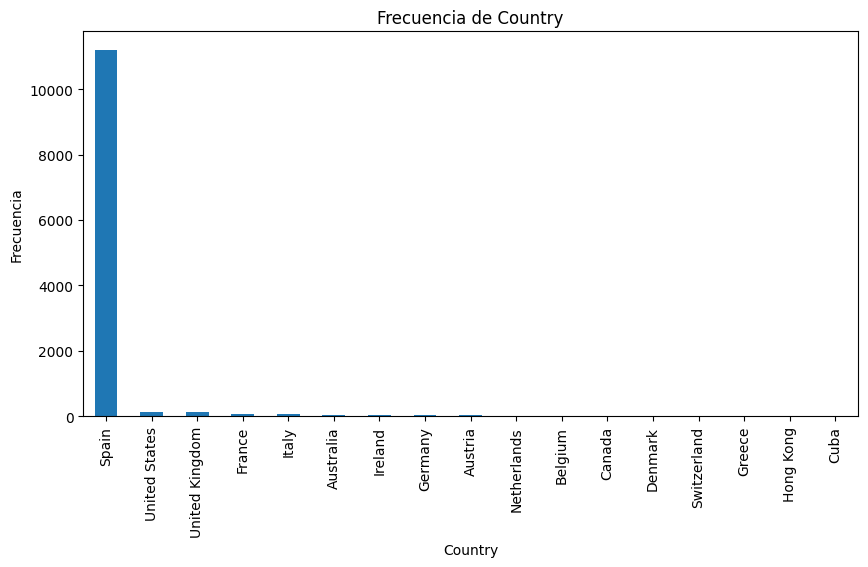

In [19]:
import matplotlib.pyplot as plt

# Variable de texto
text_var = 'Country'

# Contar las frecuencias de cada categoría
value_counts = airbnbTrain[text_var].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
value_counts.plot.bar()
plt.xlabel(text_var)
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de {text_var}')
plt.show()

Puesto que la gran mayoría de valores son para Country = 'Spain', se van a eliminar todos los valores que no corresponden a este país, para centrar el modelo únicamente en airbnb de España.

In [20]:
# Eliminamos datos cuya variable Country es distinto de Spain y por ello, la variable Country.
airbnbTrain = airbnbTrain[airbnbTrain['Country'] == 'Spain']

# Verificar el resultado
print(airbnbTrain.head())

#Eliminamos la variable
airbnbTrain.drop(columns=['Country'], inplace=True)

   Host Listings Count  Host Total Listings Count    City Country Code  \
0                  2.0                        2.0  Madrid           ES   
1                  1.0                        1.0  Madrid           ES   
2                 16.0                       16.0  Madrid           ES   
3                114.0                      114.0  Madrid           ES   
4                  2.0                        2.0  Madrid           ES   

  Country  Property Type  Room Type  Accommodates  Bathrooms  Bedrooms  ...  \
0   Spain         72.271     95.020             4        1.0       1.0  ...   
1   Spain         72.271     95.020             4        1.0       1.0  ...   
2   Spain         72.271     31.321             1        1.5       1.0  ...   
3   Spain         72.271     40.899             2        3.0       1.0  ...   
4   Spain         72.271     40.899             2        1.0       1.0  ...   

   Availability 30  Availability 60  Availability 90  Availability 365  \
0     

In [21]:
# eliminar tambien la variable country Code, que será siempre ES porque Country='Spain'
airbnbTrain.drop(columns=['Country Code'], inplace=True)

Además, vamos a analizar las distintas ciudades de los datos.

C:\Users\elisa.gutierrez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\elisa.gutierrez\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


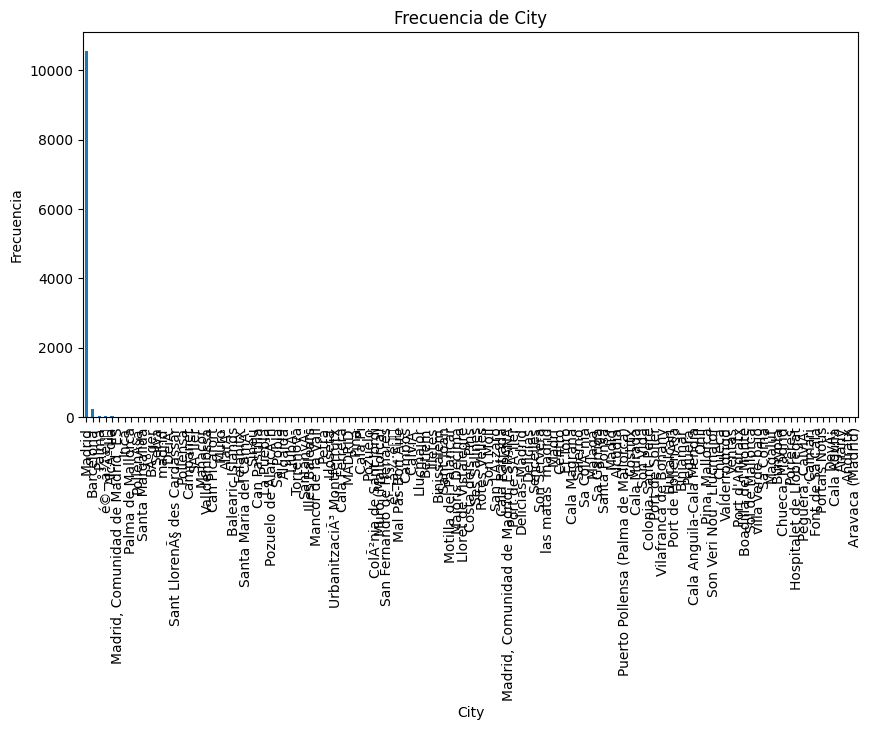

In [22]:
# Variable de texto
text_var = 'City'

# Contar las frecuencias de cada categoría
value_counts = airbnbTrain[text_var].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
value_counts.plot.bar()
plt.xlabel(text_var)
plt.ylabel('Frecuencia')
plt.title(f'Frecuencia de {text_var}')
plt.show()

Puesto que la mayoría de datos son con respecto a Madrid, eliminaremos los datos cuya ciudad sea otra y borramos esta columna, que deja de aportar valor si todos sus datos son iguales.

In [23]:
# Eliminamos datos cuya variable City es distinto de Madrid.
airbnbTrain = airbnbTrain[airbnbTrain['City'] == 'Madrid']

# Verificar el resultado
print(airbnbTrain.head())

#Eliminamos la columna City
airbnbTrain.drop(columns=['City'], inplace=True)

   Host Listings Count  Host Total Listings Count    City  Property Type  \
0                  2.0                        2.0  Madrid         72.271   
1                  1.0                        1.0  Madrid         72.271   
2                 16.0                       16.0  Madrid         72.271   
3                114.0                      114.0  Madrid         72.271   
4                  2.0                        2.0  Madrid         72.271   

   Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  ...  \
0     95.020             4        1.0       1.0   2.0    74.049  ...   
1     95.020             4        1.0       1.0   2.0    74.049  ...   
2     31.321             1        1.5       1.0   8.0    74.049  ...   
3     40.899             2        3.0       1.0   1.0    74.049  ...   
4     40.899             2        1.0       1.0   1.0    74.049  ...   

   Availability 30  Availability 60  Availability 90  Availability 365  \
0                9               32 

#### Eliminación Outliers
Ahora, vamos a seguir analizando las variables numéricas con el uso de boxplot para la observación de outliers. 
Después, se eliminarán aquellos valores que se desmarcan lo suficiente de los valores más frecuentes, según se ven en los gráficos representativos de cada variable.

Index(['Host Listings Count', 'Host Total Listings Count', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'hostVerificationCount',
       'FeaturesCount', 'AmenitiesCount'],
      dtype='object')


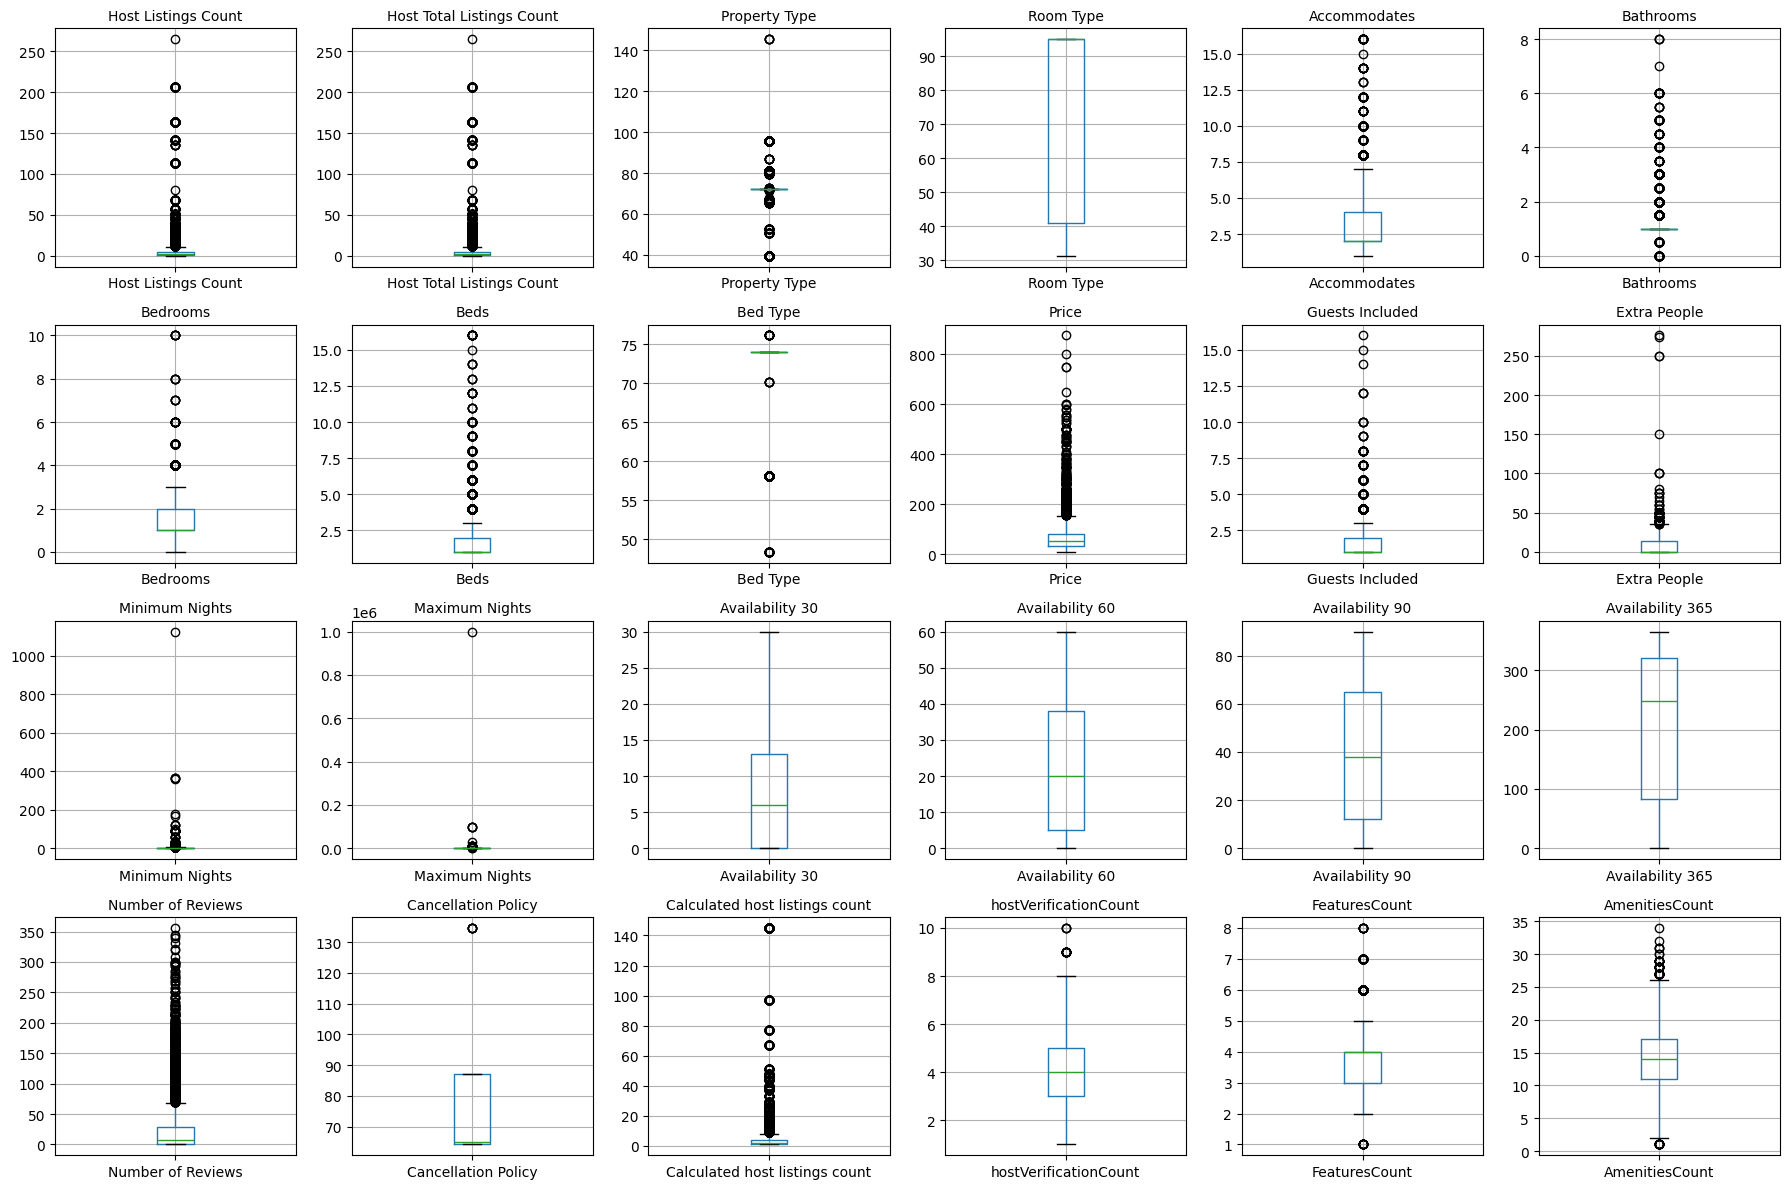

In [24]:
import matplotlib.pyplot as plt
import numpy as np

columns = airbnbTrain.columns
print(columns)

# Ajustar el tamaño de la figura
plt.figure(figsize=(18, 12))

# Número de columnas por fila
n_cols = 6

# Calcular el número de filas necesarias
n_rows = int(np.ceil(len(columns) / n_cols))

# Crear un boxplot para cada variable codificada
for i, var in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)  # (n_rows, n_cols, index)
    airbnbTrain.boxplot(column=var)
    plt.title(var, fontsize=10)

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

Observando la representación de las distintas variables, se pueden ver la existencia de outliers en cada variable. Por ello, procedemos al proceso de filtrado de outliers para que no distorsionen el análisis. A continuación, se explica el motivo detrás de cada filtrado:

1. **`Accommodates` (< 7.5)**:  
   Se filtran los alojamientos que permiten 8 o más huéspedes. Estos valores son menos frecuentes y representan propiedades grandes que podrían sesgar los resultados al incluir precios muy altos asociados a más huéspedes.

2. **`Bathrooms` (< 6)**:  
   Se eliminan propiedades con 6 o más baños. Es raro encontrar alojamientos con tantos baños, por lo que estos valores extremos no son representativos de la mayoría de los datos.

3. **`Bedrooms` (< 6)**:  
   Se excluyen propiedades con 6 o más habitaciones. Al igual que con los baños, este tipo de alojamientos suele ser una excepción y puede generar ruido en el modelo.

4. **`Price` (< 180)**:  
   Se eliminan precios mayores a 180. Esta decisión ayuda a descartar propiedades con tarifas extremadamente altas, que no representan la oferta promedio y podrían afectar las predicciones del modelo.

5. **`Beds` (< 5)**:  
   Se eliminan las propiedades con 5 o más camas. Alojamientos con muchas camas suelen ser propiedades grandes o de lujo, poco representativas del mercado general de Airbnb.

6. **`Guests Included` (< 10)**:  
   Se filtran los alojamientos que incluyen 10 o más huéspedes de forma gratuita. Estos valores son inusuales y podrían introducir sesgos.

7. **`Extra People` (< 40)**:  
   Se eliminan valores donde el coste adicional por huésped es mayor o igual a 40. Valores muy altos en esta variable suelen ser excepcionales y no son comunes.

8. **`Minimum Nights` (< 200)**:  
   Se eliminan alojamientos con un mínimo de noches extremadamente alto (200 o más). Estos valores no son representativos del alquiler típico de corta estancia en Airbnb.

9. **`FeaturesCount` (entre 2 y 5)**:  
   Se mantienen propiedades con entre 3 y 4 características. Este filtrado ayuda a centrarse en alojamientos que tienen una cantidad de características más comunes, eliminando valores extremadamente bajos o altos.

10. **`Cancellation Policy` (< 90)**:  
    Se eliminan políticas de cancelación con valores mayores o iguales a 90. Esto ayuda a centrarse en políticas de cancelación más estándar, evitando datos atípicos que no aportan información relevante.

11. **`AmenitiesCount` (entre 2 y 25)**:  
    Se mantienen propiedades con entre 3 y 24 servicios. Este rango asegura que se analicen alojamientos con una cantidad "razonable" de servicios, evitando propiedades con valores extremadamente bajos (pocos servicios) o excesivamente altos.

El objetivo principal de estos filtros es limpiar los datos eliminando valores atípicos que podrían distorsionar el análisis y el rendimiento del modelo. Estas decisiones permiten centrarse en propiedades que representan mejor la oferta típica de Airbnb y mejorar la capacidad predictiva de los modelos (Lasso y Boosted Trees).

In [25]:
# Filtramos:
airbnbTrain = airbnbTrain[airbnbTrain['Accommodates'] < 7.5]

airbnbTrain = airbnbTrain[airbnbTrain['Bathrooms'] < 6]

airbnbTrain = airbnbTrain[airbnbTrain['Bedrooms'] < 6]

airbnbTrain = airbnbTrain[airbnbTrain['Price'] < 180]

airbnbTrain = airbnbTrain[airbnbTrain['Beds'] < 5]

airbnbTrain = airbnbTrain[airbnbTrain['Guests Included'] < 10]

airbnbTrain = airbnbTrain[airbnbTrain['Extra People'] < 40]

airbnbTrain = airbnbTrain[airbnbTrain['Minimum Nights'] < 200]

airbnbTrain = airbnbTrain[(airbnbTrain['FeaturesCount'] < 5) & (airbnbTrain['FeaturesCount'] > 2)]


airbnbTrain = airbnbTrain[airbnbTrain['Cancellation Policy'] < 90]

airbnbTrain = airbnbTrain[(airbnbTrain['AmenitiesCount'] < 25) & (airbnbTrain['AmenitiesCount'] > 2)]


### Relación variables con el precio (Target)
Se van a analizar todas las variables en relación con el precio, y aquellas que no tengan una relación visual, se eliminarán para que no añadan ruido al modelo.
Para las variables numéricas, se va a representar un gráfico de dispersión, y para las categóricas, un gráfico boxplot.

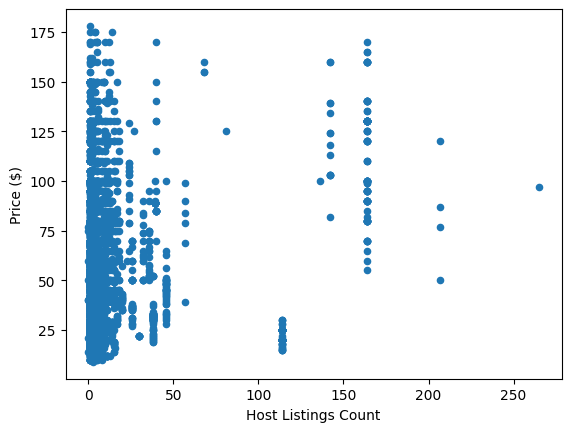

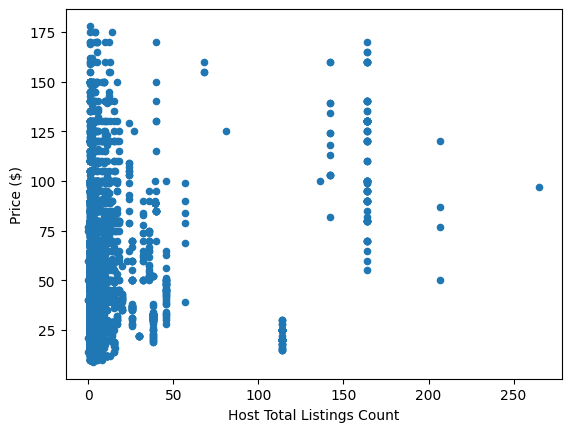

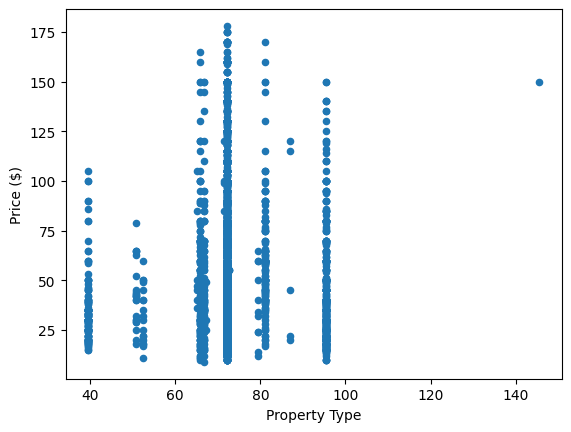

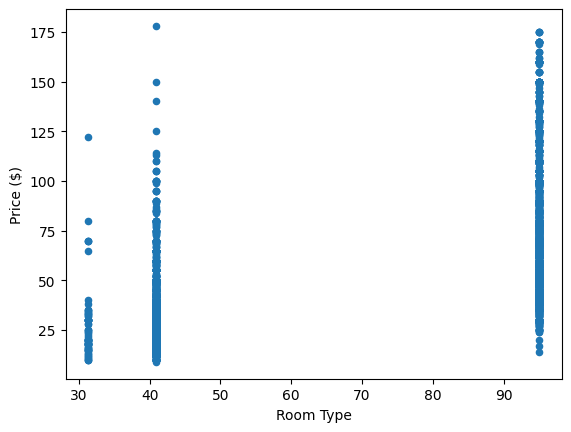

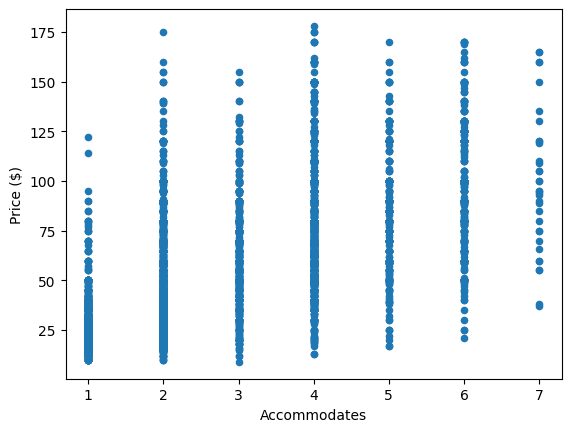

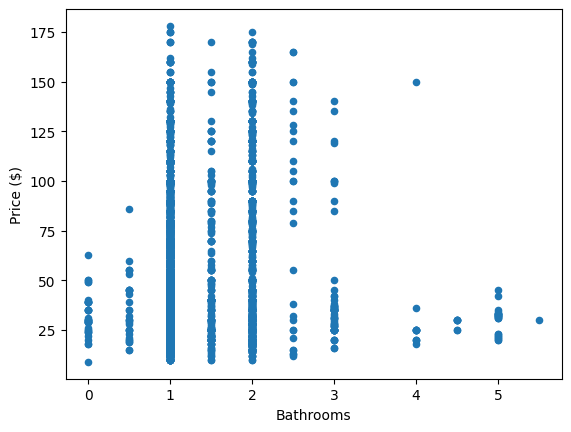

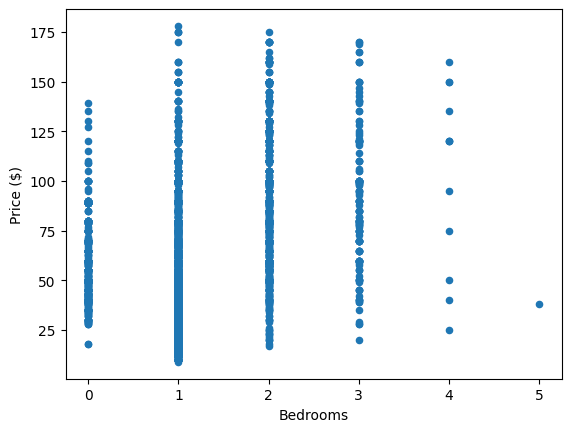

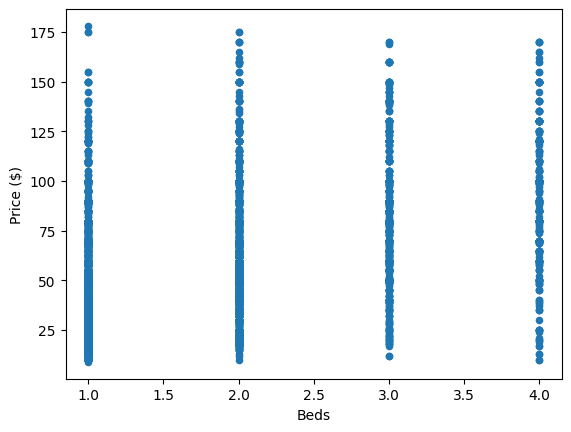

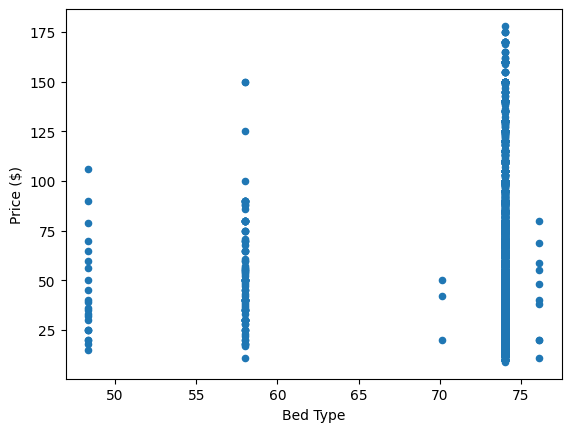

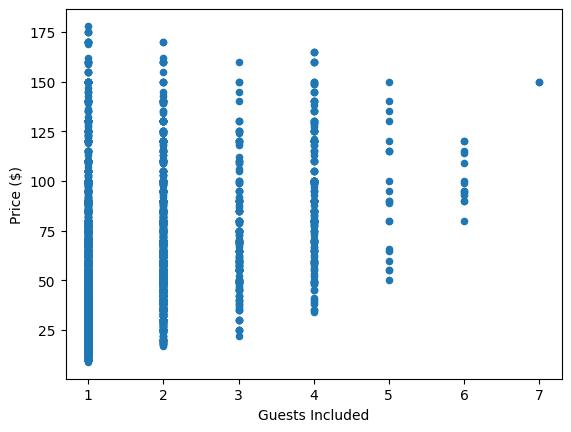

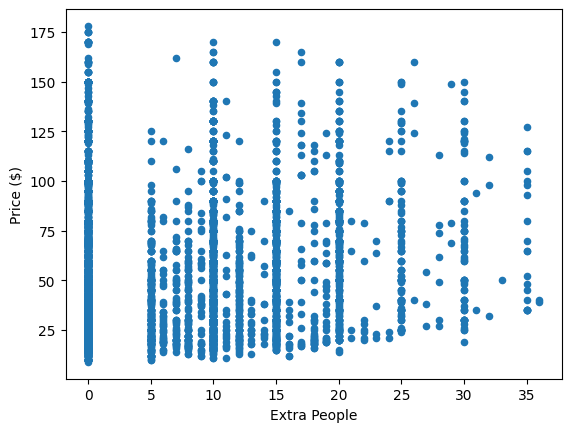

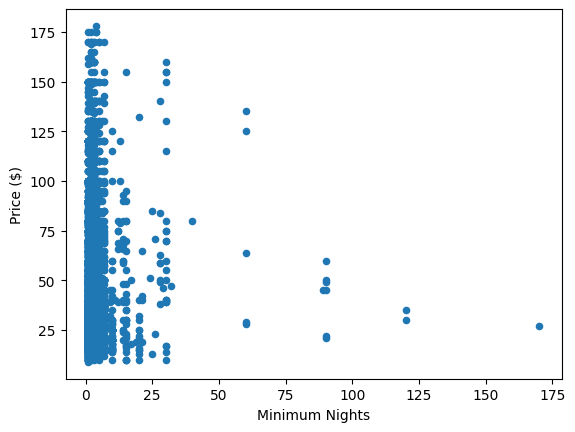

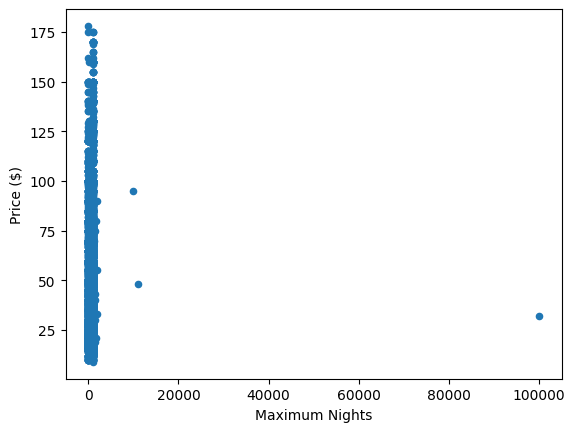

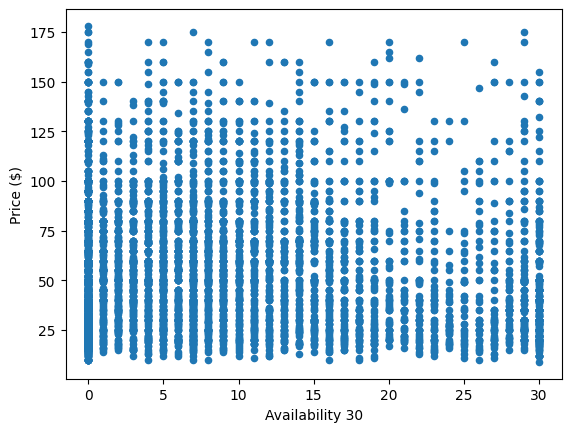

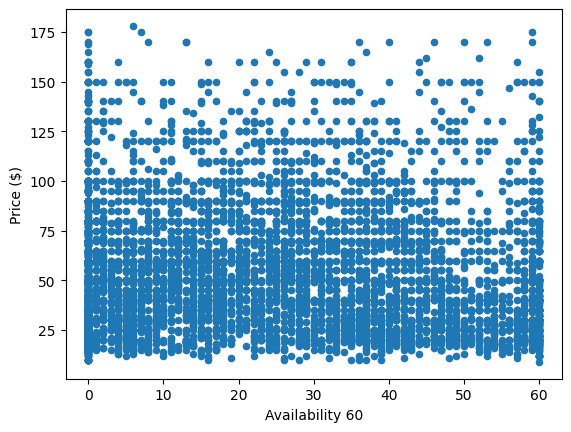

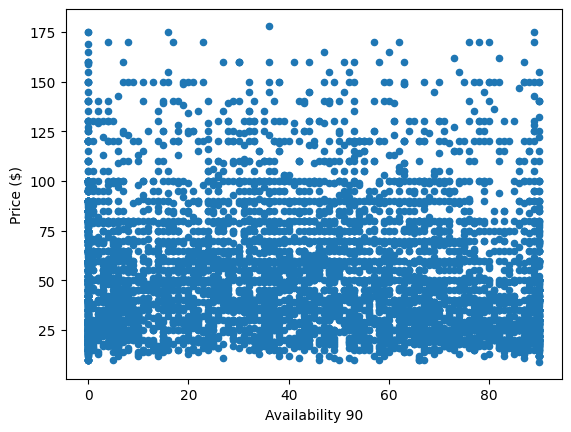

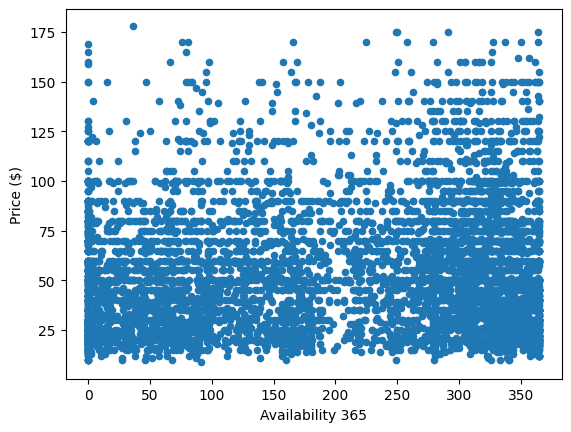

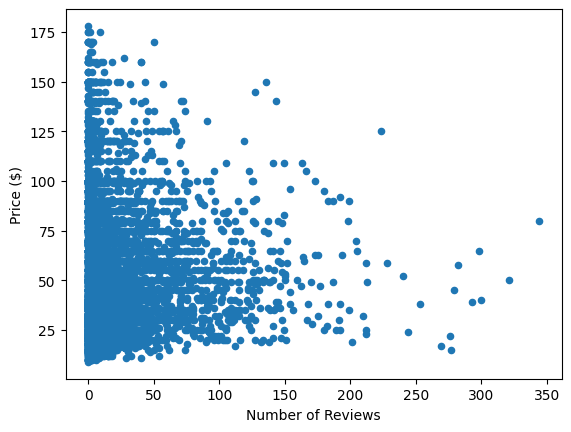

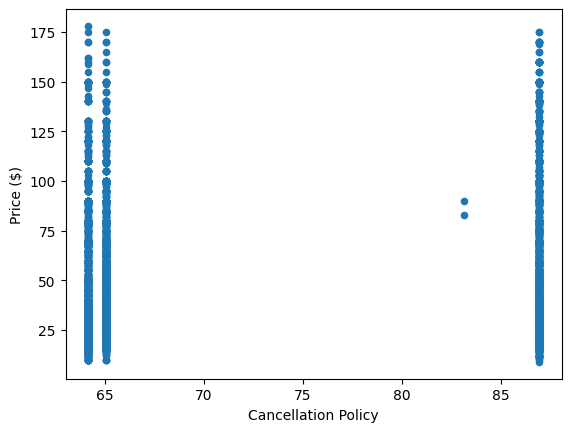

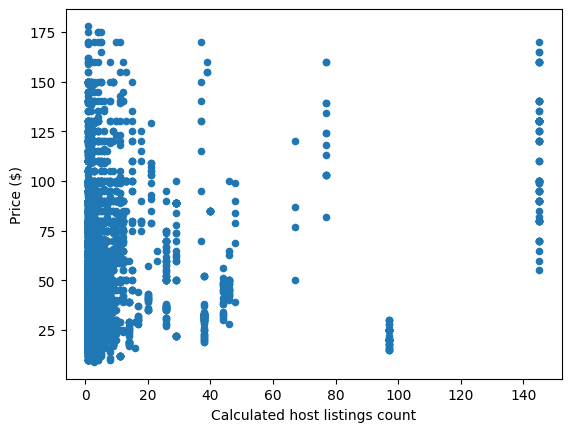

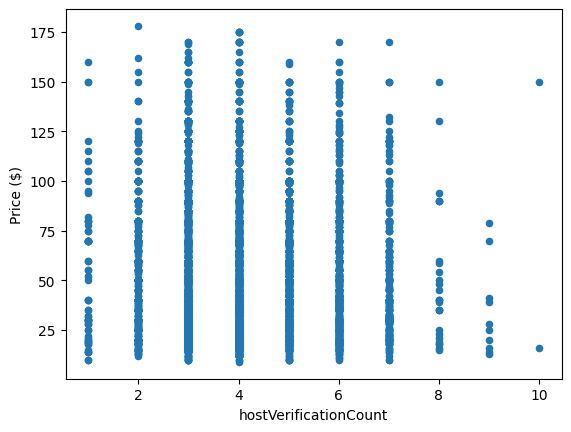

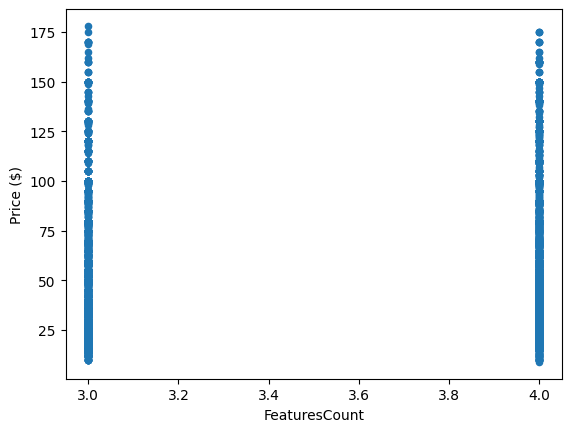

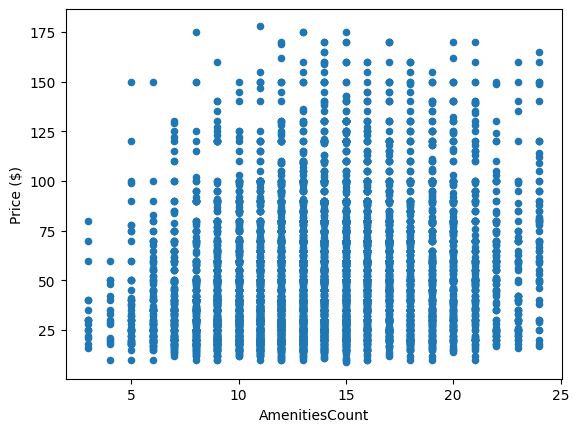

In [26]:
def plot_all_variables(df, target_var):
    for column in df.columns:
        if column != target_var:
            if df[column].dtype in ['int64', 'float64']:
                # Se crean gráficos de dispersión
                df.plot(kind='scatter', x=column, y=target_var)
                plt.xlabel(column)
                plt.ylabel(f'{target_var} ($)')
                plt.show()
            else:
                # Crear boxplots para variables categóricas
                df.boxplot(by=column, column=target_var)
                plt.xlabel(column)
                plt.ylabel(f'{target_var} ($)')
                plt.show()

# Se define Price como la variable objetivo
target_var = 'Price'

plot_all_variables(airbnbTrain, target_var)

Tras ver la relación de las variables del dataset con el precio, hemos visto que hay variables que no aportan valor, pues su representación gráfica frente al precio es random y no sigue un patrón ni relación. Por ello, se van a borrar del dataset las siguientes variables:

In [31]:
columns_to_drop_irrelevant2 = ['Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365']
airbnbTrain.drop(columns=columns_to_drop_irrelevant2, inplace=True)

### Matriz de correlación


Vamos a analizar la correlación entre todas las variables con la matriz de correlación.

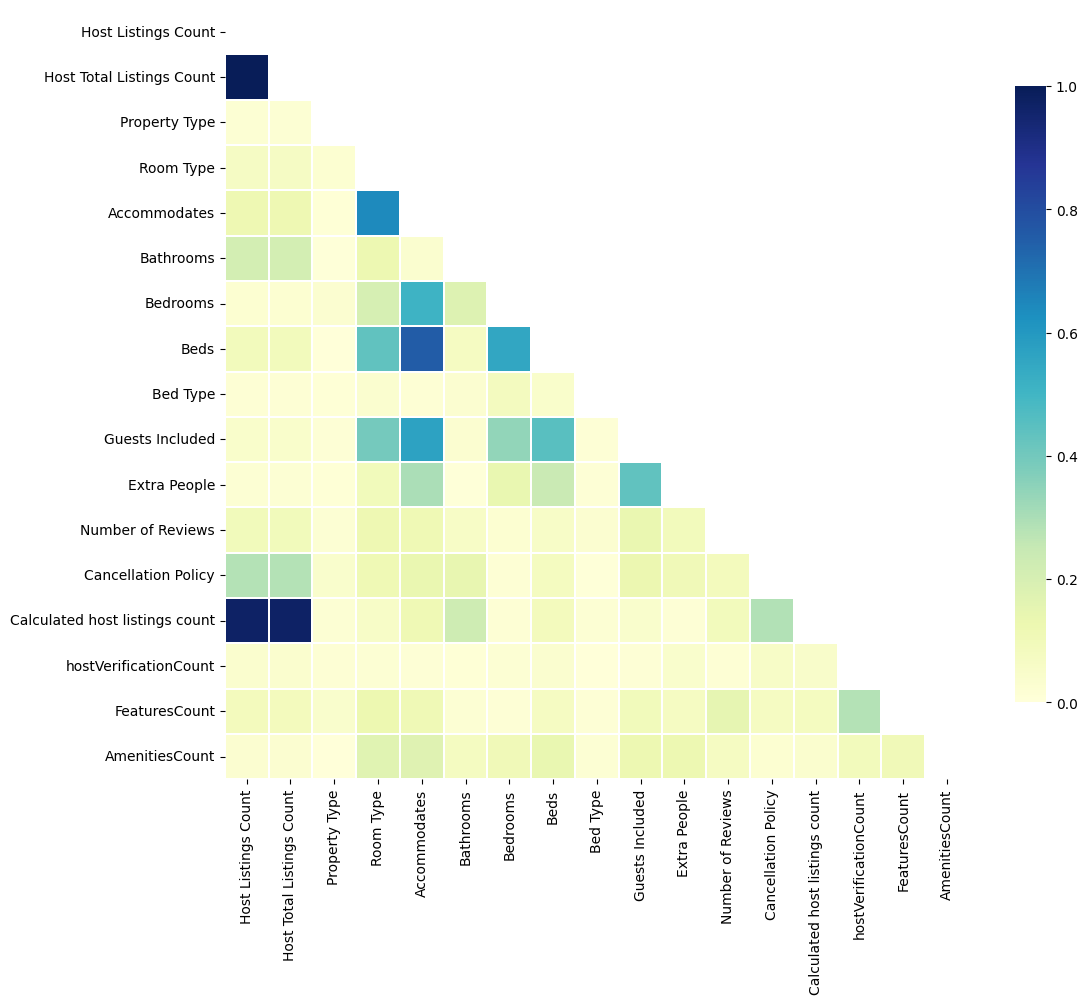

In [28]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnbTrain.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Con esta matriz de correlación, podemos ver que hay variables que tienen una alta correlación. Debido a ello, sería posible descartar una de ellas porque no es del todo útil analizar las dos.

En este caso, se va a eliminar la variable 'Host Total Listings Count' y la  variable 'Host Listings Count', puesto que tienen alta correlación con 'Calculated host listings count'.
Además, se va a borrar la variable Beds, que tiene mucha relación con la variable Bathrooms.

In [29]:
airbnbTrain.drop(columns=['Host Total Listings Count'], inplace=True)
airbnbTrain.drop(columns=['Host Listings Count'], inplace=True)

airbnbTrain.drop(columns=['Beds'], inplace=True)

## 4. Modelado, cross-validation y estudio de resultados en train y test
Antes de modelar, cargamos los datos de train de nuevo y volvemos a aplicar todos los cambios hechos durante el proceso. Después, cargamos los datos de test y aplicamos también todos los cambios a este dataset.

#### Dataset de Train

In [34]:
# Carga de datos
airbnbTrain = pd.read_csv('./airbnbTrain.csv', sep=';', decimal='.')

# Eliminar las columnas irrelevantes
airbnbTrain = airbnbTrain.drop(columns=columns_to_drop_irrelevant)

# Eliminar las columnas con muchos null
airbnbTrain = airbnbTrain.drop(columns=columns_to_drop_withNulls)

# Filtrar columnas con menos del 10% de valores nulos
columns_with_few_nulls = null_percentage[null_percentage <= 10].index

# Imputar valores nulos en las columnas con menos del 10% de valores nulos usando el valor más frecuente (moda)
for column in columns_with_few_nulls:
    airbnbTrain[column] = airbnbTrain[column].fillna(airbnbTrain[column].mode()[0])

# Columna Host Verifications Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbTrain['hostVerificationCount'] = airbnbTrain['Host Verifications'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbTrain.drop(columns=['Host Verifications'], inplace=True)

# Columna Features Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbTrain['FeaturesCount'] = airbnbTrain['Features'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbTrain.drop(columns=['Features'], inplace=True)

# Columna Amenities

# Añadir una nueva columna que cuente el número de valores en la columna 'Amenities count'
airbnbTrain['AmenitiesCount'] = airbnbTrain['Amenities'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Amenities'
airbnbTrain.drop(columns=['Amenities'], inplace=True)

# Usamos TargetEncoder
airbnbTrain['Room Type'] = encoder_room.transform(airbnbTrain['Room Type']).round(3)
airbnbTrain['Cancellation Policy'] = encoder_cancellation.transform(airbnbTrain['Cancellation Policy']).round(3)
airbnbTrain['Bed Type'] = encoder_bed.transform(airbnbTrain['Bed Type']).round(3)
airbnbTrain['Property Type'] = encoder_property.transform(airbnbTrain['Property Type']).round(3)

# Eliminamos datos cuya variable Country es distinto de Spain y por ello, la variable Country.
airbnbTrain = airbnbTrain[airbnbTrain['Country'] == 'Spain']

#Eliminamos la variable
airbnbTrain.drop(columns=['Country'], inplace=True)

# eliminar tambien la variable country Code, que será siempre ES porque Country='Spain'
airbnbTrain.drop(columns=['Country Code'], inplace=True)

# Eliminamos datos cuya variable City es distinto de Madrid.
airbnbTrain = airbnbTrain[airbnbTrain['City'] == 'Madrid']

#Eliminamos la columna City
airbnbTrain.drop(columns=['City'], inplace=True)

# Lista de variables a filtrar
variables_a_filtrar = airbnbTrain.columns

# Filtramos para eliminar outliers
airbnbTrain = airbnbTrain[airbnbTrain['Accommodates'] < 7.5]

airbnbTrain = airbnbTrain[airbnbTrain['Bathrooms'] < 6]

airbnbTrain = airbnbTrain[airbnbTrain['Bedrooms'] < 6]

airbnbTrain = airbnbTrain[airbnbTrain['Price'] < 180]
airbnbTrain = airbnbTrain[airbnbTrain['Beds'] < 5]

airbnbTrain = airbnbTrain[airbnbTrain['Guests Included'] < 10]

airbnbTrain = airbnbTrain[airbnbTrain['Extra People'] < 40]

airbnbTrain = airbnbTrain[airbnbTrain['Minimum Nights'] < 200]

airbnbTrain = airbnbTrain[(airbnbTrain['FeaturesCount'] < 5) & (airbnbTrain['FeaturesCount'] > 2)]


airbnbTrain = airbnbTrain[airbnbTrain['Cancellation Policy'] < 90]

airbnbTrain = airbnbTrain[(airbnbTrain['AmenitiesCount'] < 25) & (airbnbTrain['AmenitiesCount'] > 2)]

# Se eliminan las variables no relacionadas con el precio
airbnbTrain.drop(columns=columns_to_drop_irrelevant2, inplace=True)

# Se eliminan las variables que tienen una alta relación con otra variable
airbnbTrain.drop(columns=['Host Total Listings Count'], inplace=True)
airbnbTrain.drop(columns=['Host Listings Count'], inplace=True)
airbnbTrain.drop(columns=['Beds'], inplace=True)

# Mostrar los datos de train
print(airbnbTrain.shape)


(6294, 15)


#### Dataset de Test

In [35]:
# Carga de datos
airbnbDataTest = pd.read_csv('./airbnbTest.csv', sep=';', decimal='.')

# Aplicamos todos los cambios realizados en el dataset de train en el dataset de test

# Eliminar las columnas irrelevantes
airbnbDataTest = airbnbDataTest.drop(columns=columns_to_drop_irrelevant)

# Eliminar las columnas con muchos null
airbnbDataTest = airbnbDataTest.drop(columns=columns_to_drop_withNulls)

# Filtrar columnas con menos del 10% de valores nulos
columns_with_few_nulls = null_percentage[null_percentage <= 10].index

# Imputar valores nulos en las columnas con menos del 10% de valores nulos usando el valor más frecuente (moda)
for column in columns_with_few_nulls:
    airbnbDataTest[column] = airbnbDataTest[column].fillna(airbnbDataTest[column].mode()[0])

# Columna Host Verifications Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbDataTest['hostVerificationCount'] = airbnbDataTest['Host Verifications'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbDataTest.drop(columns=['Host Verifications'], inplace=True)

# Columna Features Counts

# Añadir una nueva columna que cuente el número de valores en la columna 'Host Verifications'
airbnbDataTest['FeaturesCount'] = airbnbDataTest['Features'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Host Verifications'
airbnbDataTest.drop(columns=['Features'], inplace=True)

# Columna Amenities

# Añadir una nueva columna que cuente el número de valores en la columna 'Amenities count'
airbnbDataTest['AmenitiesCount'] = airbnbDataTest['Amenities'].apply(lambda x: len(x.split(',')))

# Eliminar la columna 'Amenities'
airbnbDataTest.drop(columns=['Amenities'], inplace=True)

# Usamos los TargetEncoder que ya fueron entrenados en Train para test
airbnbDataTest['Room Type'] = encoder_room.transform(airbnbDataTest['Room Type']).round(3)
airbnbDataTest['Cancellation Policy'] = encoder_cancellation.transform(airbnbDataTest['Cancellation Policy']).round(3)
airbnbDataTest['Bed Type'] = encoder_bed.transform(airbnbDataTest['Bed Type']).round(3)
airbnbDataTest['Property Type'] = encoder_property.transform(airbnbDataTest['Property Type']).round(3)

# Eliminamos datos cuya variable Country es distinto de Spain y por ello, la variable Country.
airbnbDataTest = airbnbDataTest[airbnbDataTest['Country'] == 'Spain']

#Eliminamos la variable
airbnbDataTest.drop(columns=['Country'], inplace=True)

# eliminar tambien la variable country Code, que será siempre ES porque Country='Spain'
airbnbDataTest.drop(columns=['Country Code'], inplace=True)

# Eliminamos datos cuya variable City es distinto de Madrid.
airbnbDataTest = airbnbDataTest[airbnbDataTest['City'] == 'Madrid']

#Eliminamos la columna City
airbnbDataTest.drop(columns=['City'], inplace=True)

# Lista de variables a filtrar
variables_a_filtrar = airbnbDataTest.columns

# Filtramos para eliminar outliers
airbnbDataTest = airbnbDataTest[airbnbDataTest['Accommodates'] < 7.5]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Bathrooms'] < 6]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Bedrooms'] < 6]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Price'] < 180]
airbnbDataTest = airbnbDataTest[airbnbDataTest['Beds'] < 5]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Guests Included'] < 10]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Extra People'] < 40]

airbnbDataTest = airbnbDataTest[airbnbDataTest['Minimum Nights'] < 200]

airbnbDataTest = airbnbDataTest[(airbnbDataTest['FeaturesCount'] < 5) & (airbnbDataTest['FeaturesCount'] > 2)]


airbnbDataTest = airbnbDataTest[airbnbDataTest['Cancellation Policy'] < 90]

airbnbDataTest = airbnbDataTest[(airbnbDataTest['AmenitiesCount'] < 25) & (airbnbDataTest['AmenitiesCount'] > 2)]

# Se eliminan las variables no relacionadas con el precio
airbnbDataTest.drop(columns=columns_to_drop_irrelevant2, inplace=True)

# Se eliminan las variables que tienen una alta relación con otra variable
airbnbDataTest.drop(columns=['Host Total Listings Count'], inplace=True)
airbnbDataTest.drop(columns=['Host Listings Count'], inplace=True)
airbnbDataTest.drop(columns=['Beds'], inplace=True)

# Mostrar los datos de test
print(airbnbDataTest.shape)


(1577, 15)


In [36]:
print("Las siguientes columnas han sido codificadas correctamente:")
print(airbnbDataTest[['Room Type', 'Cancellation Policy', 'Bed Type', 'Property Type']])

Las siguientes columnas han sido codificadas correctamente:
      Room Type  Cancellation Policy  Bed Type  Property Type
1        40.899               65.055    58.025         72.271
2        95.020               86.942    74.049         72.271
3        40.899               65.055    74.049         72.271
7        40.899               65.055    74.049         72.271
8        40.899               64.171    74.049         72.271
...         ...                  ...       ...            ...
2947     95.020               65.055    74.049         72.271
2948     40.899               86.942    74.049         95.473
2949     95.020               64.171    74.049         72.271
2954     95.020               86.942    74.049         95.473
2955     95.020               86.942    74.049         95.473

[1577 rows x 4 columns]


Ahora podemos preparar los datos para sklearn:

In [37]:
from sklearn import preprocessing

# Pasamos la variable objetivo a la primera columna
target = airbnbTrain.pop('Price')
airbnbTrain.insert(0, 'Price', target)

targetTest = airbnbDataTest.pop('Price')
airbnbDataTest.insert(0, 'Price', targetTest)

# Dataset de train
data_train = airbnbTrain.values # Convertimos el DataFrame a matriz numpy
y_train = data_train[:,0:1]
X_train = data_train[:,1:]

# Dataset de test
data_test = airbnbDataTest.values # Convertimos el DataFrame a matriz numpy
y_test = data_test[:,0:1]
X_test = data_test[:,1:]


Normalizamos ambos data sets para mejorar el rendimiento del modelo.

In [38]:
# Escalamos las características
scaler = preprocessing.StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

# Imprimimos las primeras 5 filas de los datasets para verificar
print("Primeras 5 filas de X_train:\n", X_train[:5])
print("Primeras 5 filas de y_train:\n", y_train[:5])
print("Primeras 5 filas de X_test:\n", X_test[:5])
print("Primeras 5 filas de y_test:\n", y_test[:5])

Primeras 5 filas de X_train:
 [[72.271 95.02   4.     1.     1.    74.049  1.     0.    12.    65.055
   2.     4.     3.    13.   ]
 [72.271 95.02   4.     1.     1.    74.049  1.     0.    20.    64.171
   1.     6.     4.    18.   ]
 [72.271 40.899  2.     1.     1.    74.049  1.    10.    97.    86.942
   2.     4.     4.    15.   ]
 [72.271 95.02   4.     1.     1.    74.049  2.    21.    24.    64.171
   1.     3.     3.    20.   ]
 [72.271 40.899  2.     3.     1.    74.049  1.     5.     0.    86.942
  97.     4.     3.    12.   ]]
Primeras 5 filas de y_train:
 [[60.]
 [50.]
 [32.]
 [80.]
 [25.]]
Primeras 5 filas de X_test:
 [[72.271 40.899  1.     1.     1.    58.025  1.     0.    17.    65.055
   3.     4.     4.    17.   ]
 [72.271 95.02   2.     1.     1.    74.049  1.    25.     0.    86.942
   1.     6.     3.    12.   ]
 [72.271 40.899  1.     1.     1.    74.049  1.     0.     1.    65.055
   1.     6.     3.    12.   ]
 [72.271 40.899  1.     1.     1.    74.049  1.   

## Algoritmo Regresión Lasso.

Lasso (Least Absolute Shrinkage and Selection Operator) es un tipo de regresión regularizada que introduce una penalización en el modelo para evitar el sobreajuste (overfitting) y seleccionar las variables más relevantes. Forma parte de la regresión lineal regularizada. Su fórmula contiene un parámetro α (alpha), que controla la fuerza de la regularización.
Cuando α es pequeño, el modelo se parece a una regresión lineal estándar (sin regularización).
Cuando α es grande, los coeficientes se reducen e incluso se vuelven exactamente cero, lo que conduce a selección de características (variables irrelevantes son eliminadas).

A continuación, con el siguiente código se busca de manera automática el mejor valor del parámetro alpha para un modelo de Lasso (una regresión lineal con regularización) usando validación cruzada. Se va a generar un rango de valores para α, que determina la fuerza de la regularización. Se va a usar GridSearchCV, que busca el valor óptimo de α que minimice el error cuadrático medio negativo (neg_mean_squared_error) mediante validación cruzada de 10 pliegues (cv=10). Se ajusta el modelo Lasso iterando sobre cada valor de α.

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.104

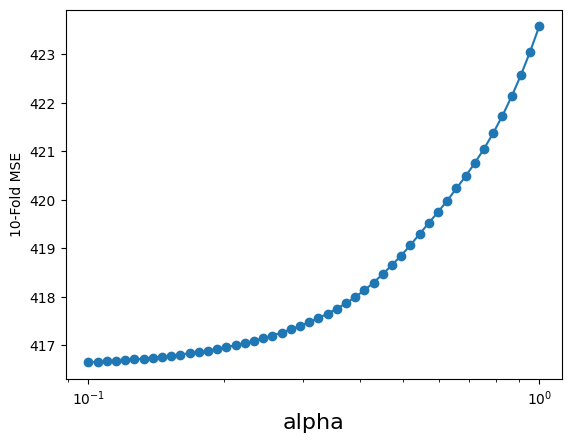

In [39]:
# Importamos GridSearchCV y Lasso de scikit-learn.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Definimos un rango de valores para 'alpha' en el modelo Lasso, utilizando una escala logarítmica de 10^-1 a 1.
# Esto nos permitirá explorar cómo cambia el rendimiento al ajustar 'alpha' en un rango amplio.
alpha_vector = np.logspace(-1, 0, 50)  # 50 valores de alpha entre 0.1 y 1.

# Configuramos una búsqueda en malla (GridSearchCV) para encontrar el mejor valor de 'alpha'.
# Usamos validación cruzada de 10 pliegues (cv=10) y puntuación basada en el error cuadrático medio negativo.
param_grid = {'alpha': alpha_vector}
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=10, verbose=2)

# Ajustamos el modelo a los datos de entrenamiento escalados.
grid.fit(X_trainScaled, y_train)

# Imprimimos el mejor puntaje de validación cruzada y el mejor valor de 'alpha' encontrado.
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Convertimos los valores negativos de la puntuación a positivos (ya que se calculó como negativo MSE).
scores = -1 * np.array(grid.cv_results_['mean_test_score'])

# Graficamos el error cuadrático medio (MSE) en función de los valores de 'alpha', usando una escala logarítmica.
plt.semilogx(alpha_vector, scores, '-o')

# Añadimos etiquetas a los ejes y mostramos el gráfico.
plt.xlabel('alpha', fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()


Encontramos que el mejor valor para alpha es 0.1.
Teniendo en cuenta esto, podemos entrenar de nuevo el modeo con este valor y poder calcular el error cuadrático medio, para después predecir con el dataset de test.

In [40]:
# Extraemos el mejor valor de alpha obtenido mediante GridSearchCV.
alpha_optimo = grid.best_params_['alpha']

# Entrenamos un modelo Lasso utilizando el valor óptimo de alpha encontrado.
lasso = Lasso(alpha=alpha_optimo).fit(X_trainScaled, y_train)

# Realizamos predicciones tanto en el conjunto de entrenamiento como en el de prueba.
ytrainLasso = lasso.predict(X_trainScaled)
ytestLasso = lasso.predict(X_testScaled)

# Calculamos el Error Cuadrático Medio (MSE) para las predicciones en el conjunto de entrenamiento.
mseTrainModelLasso = np.mean((y_train - ytrainLasso) ** 2)

# Calculamos el MSE para las predicciones en el conjunto de prueba.
mseTestModelLasso = np.mean((y_test - ytestLasso) ** 2)

# Imprimimos el MSE para los datos de entrenamiento y prueba.
print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

# Calculamos la Raíz del Error Cuadrático Medio (RMSE) para entrenamiento y prueba.
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

# Extraemos los nombres de las características del conjunto de datos.
feature_names = airbnbTrain.columns[1:]

# Extraemos los coeficientes del modelo Lasso entrenado.
w = lasso.coef_

# Iteramos sobre cada característica y su coeficiente asociado.
# Imprimimos el nombre de la característica junto con su peso (coeficiente).
for f, wi in zip(feature_names, w):
    print(f, wi)


MSE Modelo Lasso (train): 1.51e+03
MSE Modelo Lasso (test) : 1.49e+03
RMSE Modelo Lasso (train): 38.8
RMSE Modelo Lasso (test) : 38.6
Property Type -0.21319575635394525
Room Type 14.369681984650974
Accommodates 7.568735977653855
Bathrooms 1.0266436534128023
Bedrooms 4.627018802191632
Bed Type 0.2111311223496174
Guests Included 0.5869587116232249
Extra People -0.9360501599937658
Number of Reviews -2.6588222938107493
Cancellation Policy 0.0
Calculated host listings count 2.6613559893117587
hostVerificationCount -1.1949553725698585
FeaturesCount 0.6711902302846154
AmenitiesCount 2.722872242167016


### Conclusiones Lasso  

Los resultados del modelo Lasso muestran que el MSE (Error Cuadrático Medio) es de 1.51e+03 en el conjunto de entrenamiento y 1.49e+03 en el conjunto de prueba. Esto indica que el modelo tiene un rendimiento similar en ambos conjuntos, lo que sugiere que no está sobreajustado ni subajustado.

Los valores de RMSE (Raíz del Error Cuadrático Medio) son 38.8 en entrenamiento y 38.6 en prueba. Esto significa que, en promedio, el modelo comete un error de aproximadamente 38.8 unidades monetarias al predecir los precios en entrenamiento y 38.6 en prueba. Aunque estos valores parecen relativamente bajos, si consideramos un precio medio de 73.56, el error representa alrededor del 52-53% del precio medio, lo que sugiere que todavía hay margen de mejora.

En cuanto a los coeficientes de las variables:

*  Las variables con mayor impacto positivo en el precio son Room Type (14.37), Accommodates (7.57) y Bedrooms (4.63). Esto implica que el tipo de habitación, la capacidad de alojamiento y el número de habitaciones son los factores más influyentes en la predicción del precio.
*  Variables con coeficientes negativos, como Extra People (-0.94) y Number of Reviews (-2.66), indican que cobrar por huéspedes adicionales puede reducir el atractivo del anuncio y que un mayor número de reseñas podría estar asociado con alojamientos más económicos.
*  Algunas variables tienen impacto bajo o nulo, como Property Type (-0.21), Bed Type (0.21) y Cancellation Policy (0.0). Especialmente, el coeficiente cero de Cancellation Policy indica que el modelo Lasso ha descartado esta variable por no aportar información relevante.
*  Otras variables con impacto moderado, como Bathrooms (1.03), Calculated host listings count (2.66) y AmenitiesCount (2.72), siguen influyendo en el precio, aunque en menor medida que las principales.

En general, el modelo Lasso ha seleccionado un conjunto de variables clave, descartando otras sin relevancia, lo cual es una ventaja de este método. Sin embargo, el error sigue siendo considerablemente alto en relación con el precio medio, lo que indica que podrían explorarse otros enfoques, como modelos más complejos o la inclusión de nuevas variables.

## Algoritmo Boosted Trees


Gradient Boosting es un método de ensembles que combina múltiples árboles de decisión débiles (árboles con poca profundidad) para obtener un modelo más fuerte y preciso. Se utiliza principalmente para problemas de regresión y clasificación.

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   3.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   3.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   5.5s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=   7.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   1.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   5.5s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=   7.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=   7.1s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=500; total time=   1.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.5, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1000; total time=   3.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1000; total time=   3.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1500; total time=   5.5s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=1500; total time=   5.5s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.5, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.8s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   3.6s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   3.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   3.7s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1500; total time=   5.4s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=1500; total time=   5.3s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.01, n_estimators=2000; total time=   7.2s


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


best mean cross-validation score: 0.648
best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


c:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


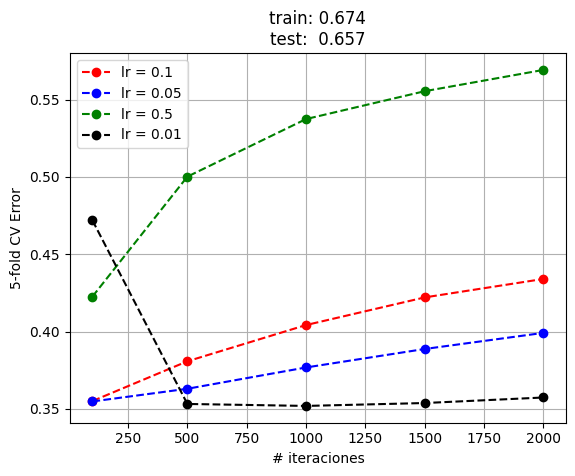

In [41]:
# Importamos la librería GradientBoostingRegressor de sklearn.
from sklearn.ensemble import GradientBoostingRegressor

# Definimos las listas de valores para el número de iteraciones (n_estimators) y las tasas de aprendizaje (learning_rate)
Niterations = [100, 500, 1000, 1500, 2000]
learningRate = [0.1, 0.05, 0.5, 0.01]

# Creamos un diccionario con los parámetros que queremos optimizar: número de estimadores y tasa de aprendizaje.
param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}

# Configuramos una búsqueda en malla (GridSearchCV) para encontrar los mejores parámetros.
# Utilizamos GradientBoostingRegressor con una profundidad máxima de 5 y validación cruzada de 3 pliegues (cv=3).
# La opción verbose=2 nos permite ver el progreso del entrenamiento.
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5),
                    param_grid=param_grid, cv=3, verbose=2)

# Ajustamos el modelo con los datos de entrenamiento.
grid.fit(X_train, y_train)

# Imprimimos el mejor puntaje de validación cruzada y los mejores parámetros encontrados.
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Hacemos predicciones utilizando un modelo Lasso previamente entrenado (aunque no se muestra aquí).
ytrainLasso = lasso.predict(X_trainScaled)
ytestLasso  = lasso.predict(X_testScaled)

# Extraemos los mejores valores de learning_rate y n_estimators encontrados con GridSearchCV.
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']

# Creamos un nuevo modelo de GradientBoostingRegressor con los mejores parámetros encontrados.
# En este caso, establecemos una profundidad máxima de 3.
bt = GradientBoostingRegressor(random_state=0, max_depth=3, learning_rate=lrOptimo, n_estimators=neOptimo)

# Ajustamos este modelo optimizado con los datos de entrenamiento.
bt.fit(X_train, y_train)

# Calculamos el error de validación cruzada para cada combinación de parámetros obtenidos en la búsqueda.
error = 1 - grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))

# Definimos una lista de colores para graficar los resultados.
colors = ['r', 'b', 'g', 'k', 'm']

# Iteramos sobre cada tasa de aprendizaje y graficamos el error correspondiente.
for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i, :], colors[i] + '--o', label='lr = %g' % lr)

# Añadimos leyenda, etiquetas y título al gráfico.
plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f' % (bt.score(X_train, y_train), bt.score(X_test, y_test)))

# Mostramos una cuadrícula en el gráfico para facilitar la visualización.
plt.grid()

# Finalmente, mostramos el gráfico con los resultados.
plt.show()


#### Conclusiones Boosted Trees
La mejor combinación de hiperparámetros es una tasa de aprendizaje baja (lr = 0.01) con un número alto de iteraciones, ya que proporciona el menor error de validación cruzada y evita el sobreajuste.

El rendimiento del modelo en entrenamiento (train: 0.674) es ligeramente mayor que en prueba (test: 0.657), indicando un buen ajuste general sin un sobreajuste significativo para la mejor configuración.
La menor tasa de aprendizaje (lr = 0.01) parece la más prometedora porque mantiene el error bajo y estable.

También podemos ver la importancia de cada variable en el modelo con el siguiente gráfico:

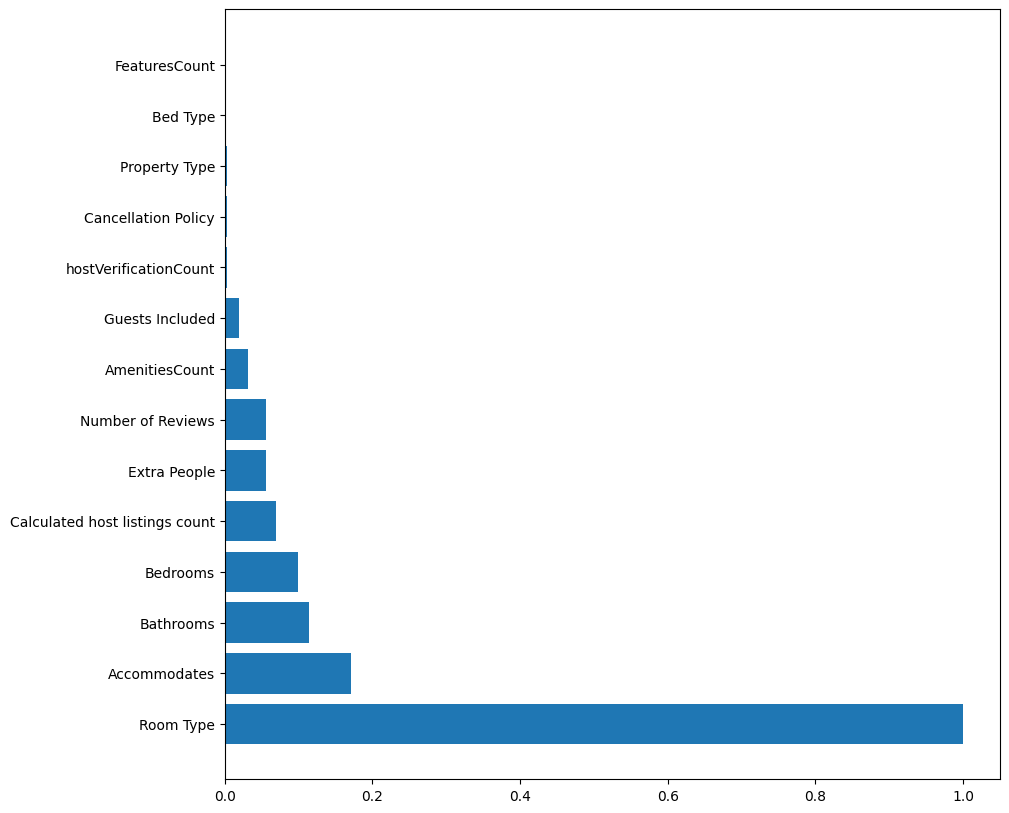

In [42]:
# Extraemos la importancia de las características del modelo  Boosted Trees ya entrenado.
importances = bt.feature_importances_

# Normalizamos las importancias dividiéndolas entre el valor máximo para escalar los resultados entre 0 y 1.
importances = importances / np.max(importances)

# Ordenamos los índices de las características en orden descendente según su importancia.
indices = np.argsort(importances)[::-1]

# Creamos una figura con un tamaño específico para la visualización.
plt.figure(figsize=(10, 10))

# Graficamos las importancias de las características en forma de barras horizontales.
# Las características se ordenan según su índice en "indices".
plt.barh(range(X_train.shape[1]), importances[indices])

# Etiquetamos cada barra con el nombre de la característica correspondiente.
plt.yticks(range(X_train.shape[1]), feature_names[indices])

# Mostramos el gráfico con las importancias normalizadas.
plt.show()

Podemos ver que la variable que más ha afectado en el resultado del modelo es Room Type, seguida de Accomodates, Bathrooms, bedrooms, etc.


## 5. Conclusiones
Al comparar los resultados de Lasso y Boosted Trees, encontramos que ambos modelos coinciden en que Room Type y Accommodates son las variables más importantes, lo que tiene sentido porque el tipo de habitación y la capacidad de huéspedes son factores clave. Sin embargo, hay algunas diferencias interesantes entre los dos algoritmos.

En Lasso, la variable AmenitiesCount tiene un peso más fuerte, lo que significa que el número de comodidades disponibles es muy relevante en este modelo. Esto se debe a que Lasso es lineal y destaca las relaciones más directas y fáciles de interpretar.

Por otro lado, en Boosted Trees, la variable Number of Reviews tiene un efecto positivo, mientras que en Lasso, esta misma variable impacta de forma negativa. Boosted Trees, al ser un modelo no lineal, puede captar relaciones más complejas, como que un mayor número de reseñas a veces refleja una buena reputación o alta demanda, lo cual puede influir positivamente en los resultados.

En resumen, Lasso tiende a simplificar y enfocarse en variables con relaciones claras, mientras que Boosted Trees es más flexible y captura patrones no lineales que Lasso podría pasar por alto. Aunque ambos modelos coinciden en lo esencial, sus diferencias muestran cómo cada uno interpreta la información desde enfoques distintos.